<a href="https://colab.research.google.com/github/terrainthesky-hub/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Lesley_Rich_231_assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Data set: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
df = pd.read_csv(r'C:\Users\Lesley\Downloads\video-game-sales-with-ratings\Video_Games_Sales_as_at_22_Dec_2016.csv')



print(df.shape)
df.head(100)

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,NaN,NaN,NaN,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Subsetting the dataframe to remove the games with missing values in some columns

#df2 = df.dropna()

In [0]:
#df2.head()

In [0]:
#Saving for later for column na 

#no_na = []
#for row in df:
#    if df[row].isna().sum() == 0:
#        no_na.append(f'{row}')

In [0]:
#df = df[no_na]

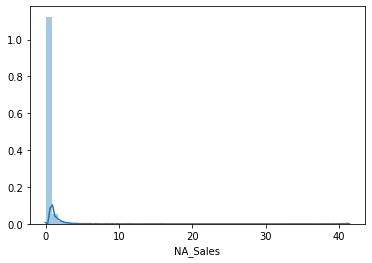

In [0]:
y = df['NA_Sales']

import seaborn as sns

sns.distplot(y)

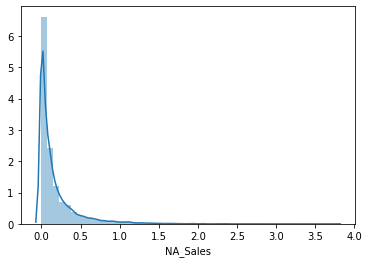

In [0]:
#Log transforming the target because it's right skewed

import numpy as np
y_log = np.log1p(y)
sns.distplot(y_log)

In [0]:
#Dropping sales columns of other countries to prevent data leakage
df2 = df.drop(columns=['Global_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [0]:
#Creating a binary column that says whether a publisher is AAA
df2['AAA_Publisher'] = df2['Publisher'].str.contains('Nintendo') | df2['Publisher'].str.contains('Take-Two Interactive') | df2['Publisher'].str.contains('Activision') | df2['Publisher'].str.contains('Microsoft Game Studios')| df2['Publisher'].str.contains('Sony Computer Entertainment') | df2['Publisher'].str.contains('Electronic Arts') | df2['Publisher'].str.contains('SquareSoft') | df2['Publisher'].str.contains('Ubisoft') | df2['Publisher'].str.contains('Bethesda Softworks') | df2['Publisher'].str.contains('Capcom')

In [0]:
df2.head()

In [0]:
#Dropping lots of rows with missing values to hopefully make a better model by retaining features

df2 = df2.dropna()

In [0]:

#resetting the index
df2 = df2.reset_index()

In [0]:
from sklearn.model_selection import train_test_split

#Doing a 3 way train, val, test split

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

train, validate, test = train_validate_test_split(df2)


In [0]:
train.head()

In [0]:



target = 'NA_Sales'
#Dropping data leakage of sales from other countries



features = train.columns.drop([target], 'Name')

X_train = train[features]
y_train = train[target]
X_val = validate[features]
y_val = validate[target]
X_test = test[features]
y_test = test[target]


y_train_log = np.log1p(y_train)


In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(),
    )

pipeline.fit(X_train, y_train_log)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Name', 'Platform', 'Genre', 'Publisher',
                                      'User_Score', 'Developer', 'Rating'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Name',
                                          'data_type': dtype('O'),
                                          'mapping': SEGA Classics Collection               1
Football Manager 2014                  2
Drakengard 3                           3
Pirates: The Legend of Black Kat       4
Meta...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                        

In [0]:
from sklearn.metrics import mean_absolute_error

y_pred_log = pipeline.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))

0.10554457883574367


In [0]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pipeline = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(),
    RandomForestRegressor()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestregressor__n_estimators': randint(5,500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, 25, None],
    'randomforestregressor__max_features': uniform(0, 1),
    'randomforestregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'randomforestregressor__min_samples_split': [5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    scoring='r2',
    verbose=10,
    return_train_score=True,
    n_jobs=-1)

search.fit(X_train, y_train_log);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:   21.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.5s finished


In [0]:
pipeline = search.best_estimator_

In [0]:
print('Best hyperparameters', search.best_params_)

Best hyperparameters {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 0.7810762504983317, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 463, 'simpleimputer__strategy': 'mean'}


In [0]:
y_pred_log = pipeline.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))

0.10702346661580649


In [0]:
from sklearn.metrics import r2_score
#Validation score for RandomForestRegressor

y_pred_log = pipeline.predict(X_val)
y_pred = np.expm1(y_pred_log)
r2_score(y_val, y_pred)

0.9072757740695758

In [0]:
#Test score for RandomForestRegressor
#Looks like I'm overfitting

y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
r2_score(y_test, y_pred)

0.5525327429326761

In [0]:
from sklearn.linear_model import LinearRegression


pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    LinearRegression(),
    )

pipeline.fit(X_train, y_train_log)

y_pred_log = pipeline.predict(X_val)
y_pred = np.expm1(y_pred_log)
print(mean_absolute_error(y_val, y_pred))
print(r2_score(y_val, y_pred))

0.2658541639962923
0.29307022374785896
